In [2]:
from pylab import *
%run integradores.ipynb
%matplotlib inline

In [3]:
inicial = [1,2,1]
dominio = [[1,1.9],[1,2.1]]

def ecuacion(y,t):
    y_3dot = exp(-t)*sin(3*t) - cos(y[0])*cos(y[0]) + 3*y[1]*y[1]*y[1] - y[2]*y[2]
    return array([y[1],y[2],y_3dot])

In [4]:
t1,sol1 = int_rk4(ecuacion,inicial,[1,1.87],h=0.001)

In [11]:
t2,sol2 = int_rk4(ecuacion,sol1[-1],[1.87,1.970],h=0.000001)

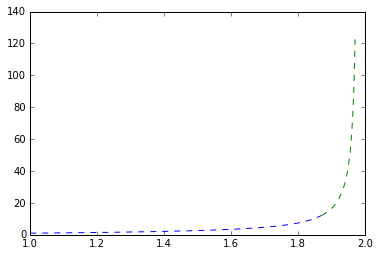

In [12]:
plot(t1,sol1[:,0],"--")
plot(t2,sol2[:,0],"--")